<a href="https://colab.research.google.com/github/Joa1Camargo/Analise-de-Dados/blob/main/Container_delivery_date_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de Entrega de Containers

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pylab
import missingno as mso

from math import radians, sin, cos, asin, sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [30]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/Containers /Container Tracking Data.xlsx')
data.head()

,CONTAINER_NUMBER,VESSEL_NAME,FREIGHT_FORWARDER,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,LAST_TRACKED_WITH_VESSEL,DELIVERED_FLAG,DELIVERED_DATE,Another NEW Predicated Delivery Date
0,FCIU8573349,CAPE SOUNIO,CIF,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-17,2021-07-15,2021-08-03,2021-08-03,Yes,2021-07-21,?
1,TGBU9903815,CAPE SOUNIO,CIF,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-23,2021-07-21,2021-08-09,2021-07-26,Yes,2021-07-27,?
2,TCNU3242533,OOCL LUXEMBOURG,Axiom,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-04-11,2021-04-17 00:00:00,2021-05-05,2021-06-07,2021-06-11,2021-06-20,Yes,2021-06-16,?
3,FCIU8623774,MSC ORION,LF,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-05-19,2021-05-20 00:00:00,2021-07-15,2021-07-12,2021-07-19,2021-08-24,Yes,2021-07-20,?
4,FCIU9776905,COSCO ENGLAND,CIF,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-05-18,2021-05-24 00:00:00,2021-06-11,2021-06-22,2021-06-26,2021-06-26,Yes,2021-06-28,?


#Processamento de Dados

Antes de construir o modelo de machine learning, é necessário realizar a limpeza do dataset.
Buscar por dados incompletos ou faltantes e eliminar dados que não são necessários (ou não
são de interesse) para essa análise.

In [31]:
data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max
CONTAINER_NUMBER,1830,1830,TGHU9306386,1,NaN,NaN,NaN,NaN,NaN,NaN
VESSEL_NAME,1534,478,COSCO ITALY,39,NaN,NaN,NaN,NaN,NaN,NaN
FREIGHT_FORWARDER,1401,79,Axiom,305,NaN,NaN,NaN,NaN,NaN,NaN
PLACE_OF_DISPATCH,1521,132,"Yantian, Guangdong Sheng, China",318,NaN,NaN,NaN,NaN,NaN,NaN
PORT_OF_LOADING,1577,107,"Yantian, Guangdong Sheng, China",339,NaN,NaN,NaN,NaN,NaN,NaN
PORT_OF_DISCHARGE,1564,125,"Long Beach, California, United States",651,NaN,NaN,NaN,NaN,NaN,NaN
POST_PORT_OF_DISCHARGE,1507,140,"Dallas, Texas, United States",938,NaN,NaN,NaN,NaN,NaN,NaN
PLACE_OF_DISPATCH_DATE,1581,NaN,NaN,NaN,2021-07-08 11:03:59.089184,2005-07-29 00:00:00,2021-04-17 00:00:00,2021-07-21 00:00:00,2021-11-23 00:00:00,2022-02-18 00:00:00
PORT_OF_LOADING_DATE,1581,451,2021-11-15 00:00:00,21,NaN,NaN,NaN,NaN,NaN,NaN
PORT_OF_DISCHARGE_DATE,1494,NaN,NaN,NaN,2021-08-17 20:14:27.469879296,2005-08-08 00:00:00,2021-05-17 00:00:00,2021-09-03 12:00:00,2022-01-11 00:00:00,2022-04-15 00:00:00


,0
CONTAINER_NUMBER,0
VESSEL_NAME,296
FREIGHT_FORWARDER,429
PLACE_OF_DISPATCH,309
PORT_OF_LOADING,253
PORT_OF_DISCHARGE,266
POST_PORT_OF_DISCHARGE,323
PLACE_OF_DISPATCH_DATE,249
PORT_OF_LOADING_DATE,249
PORT_OF_DISCHARGE_DATE,336


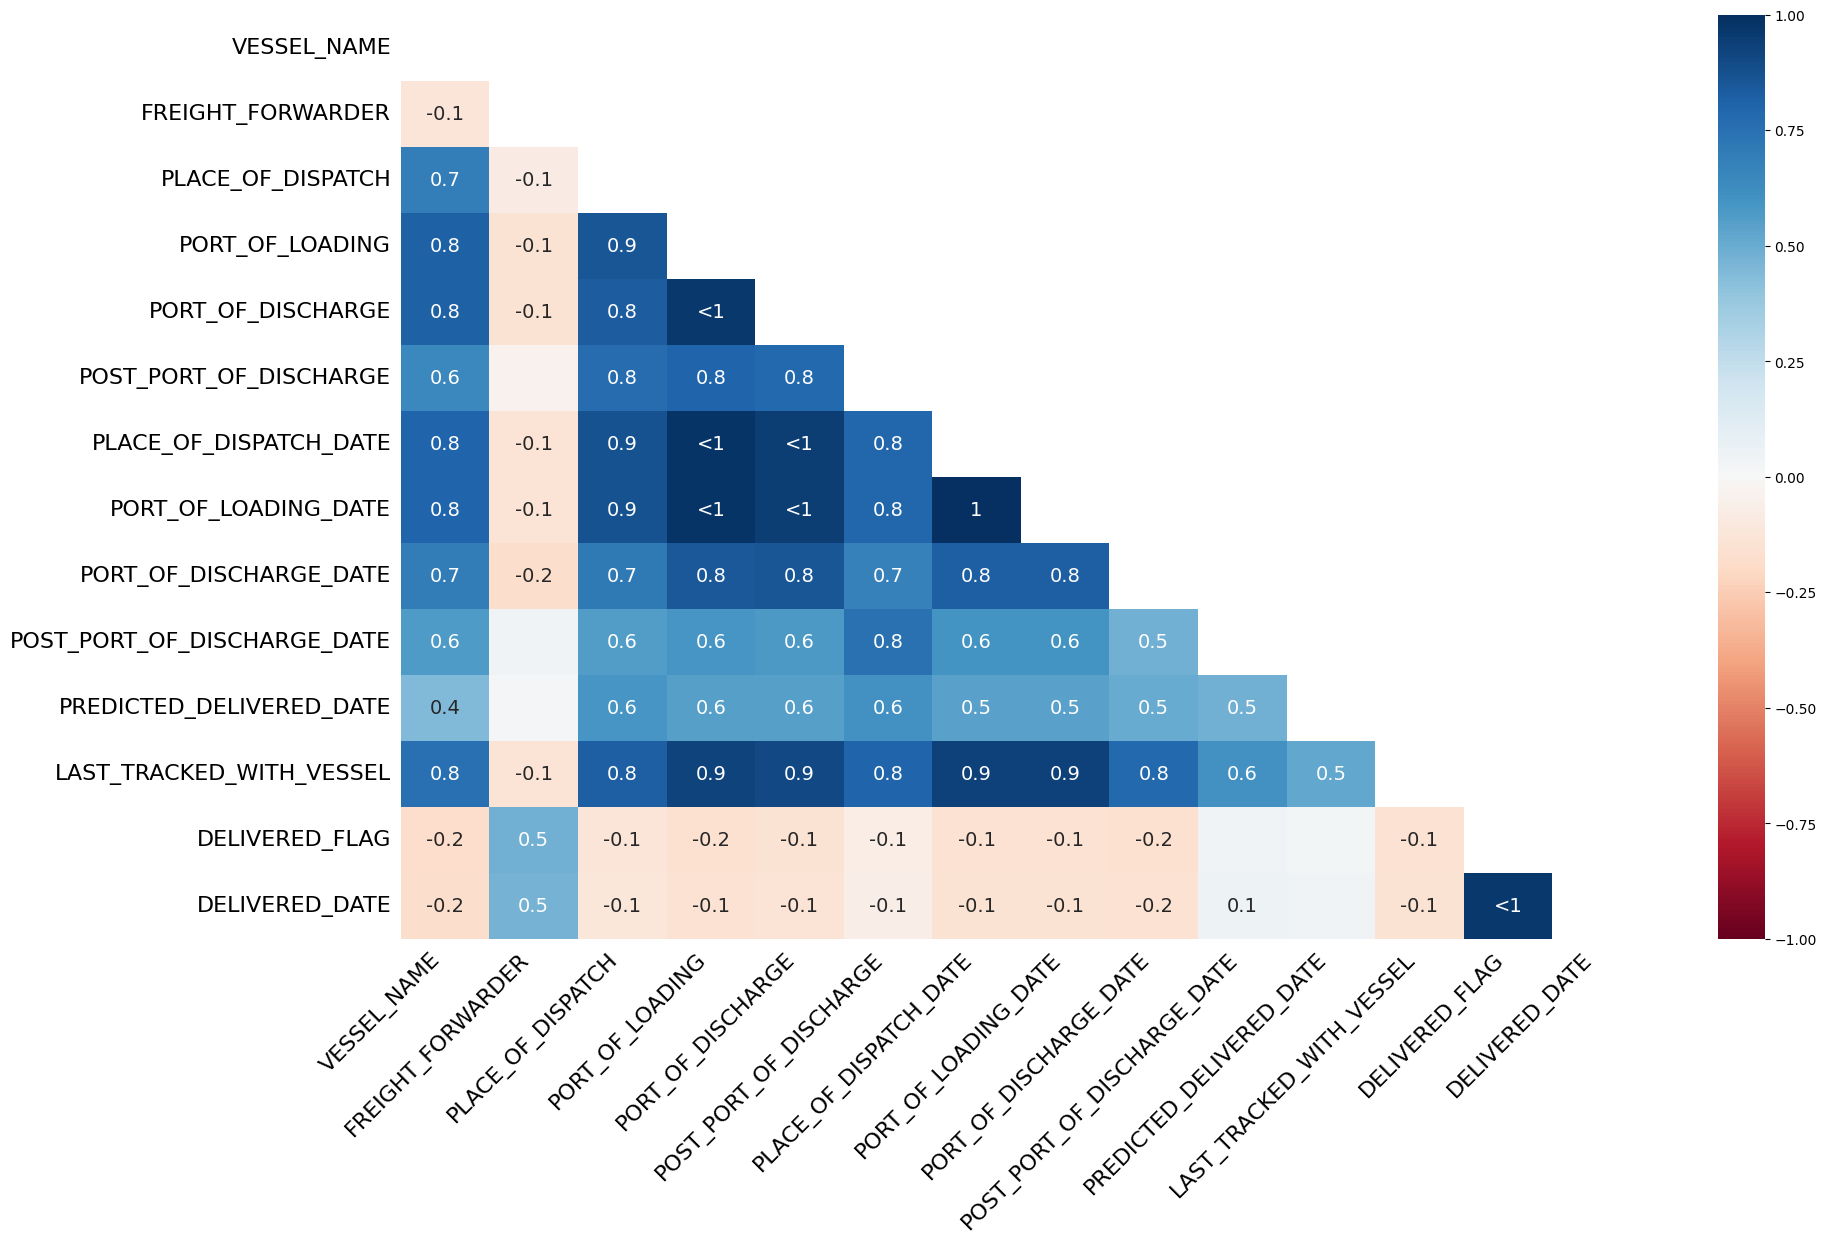

In [32]:
# Verificando os valores nulos do dataset
mso.heatmap(data)
data.isnull().sum()

In [33]:
# Removendo as colunas que não são de interesse para essa análise
data.drop(columns=['CONTAINER_NUMBER','VESSEL_NAME','FREIGHT_FORWARDER','Another NEW Predicated Delivery Date'])

,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,LAST_TRACKED_WITH_VESSEL,DELIVERED_FLAG,DELIVERED_DATE
0,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-17,2021-07-15,2021-08-03,2021-08-03,Yes,2021-07-21
1,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-23,2021-07-21,2021-08-09,2021-07-26,Yes,2021-07-27
2,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-04-11,2021-04-17 00:00:00,2021-05-05,2021-06-07,2021-06-11,2021-06-20,Yes,2021-06-16
3,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-05-19,2021-05-20 00:00:00,2021-07-15,2021-07-12,2021-07-19,2021-08-24,Yes,2021-07-20
4,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-05-18,2021-05-24 00:00:00,2021-06-11,2021-06-22,2021-06-26,2021-06-26,Yes,2021-06-28
...,...,...,...,...,...,...,...,...,...,...,...,...
1825,"Chattogram, Chittagong, Bangladesh","Chattogram, Chittagong, Bangladesh","Los Angeles, California, United States","Dallas, Texas, United States",2021-11-11,2021-11-15 00:00:00,2022-02-16,2022-02-27,2022-03-03,2022-02-16,NaN,NaT
1826,"Tianjin Xingang, Tianjin Shi, China","Tianjin Xingang, Tianjin Shi, China","Long Beach, California, United States","Dallas, Texas, United States",2022-01-09,2022-01-13 00:00:00,2022-03-12,2022-03-06,2022-03-29,2022-02-18,NaN,NaT
1827,"Ho Chi Minh City, Ho Chi Minh City, Vietnam","Cai Mep, Tinh Ba Ria-Vung Tau, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2022-01-30,2022-02-01 00:00:00,2022-03-01,2022-03-08,2022-03-12,2022-02-18,NaN,NaT
1828,"Tianjin Xingang, Tianjin Shi, China","Tianjin Xingang, Tianjin Shi, China","Dallas, Texas, United States","Dallas, Texas, United States",2021-12-21,2021-12-29 00:00:00,2022-03-29,2022-02-18,2022-02-18,2022-02-15,NaN,NaT


In [34]:
# Removendo os valores nulos para essa análise (sei que não é o ideal, mas é o mais fácil por enquanto)
clean_data=data.dropna()

In [35]:
clean_data.drop(columns=['CONTAINER_NUMBER','VESSEL_NAME','FREIGHT_FORWARDER','Another NEW Predicated Delivery Date','LAST_TRACKED_WITH_VESSEL','DELIVERED_FLAG','Another NEW Predicated Delivery Date'],inplace = True)
clean_data.head()

/tmp/ipython-input-1199090128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=['CONTAINER_NUMBER','VESSEL_NAME','FREIGHT_FORWARDER','Another NEW Predicated Delivery Date','LAST_TRACKED_WITH_VESSEL','DELIVERED_FLAG','Another NEW Predicated Delivery Date'],inplace = True)


,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,DELIVERED_DATE
0,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-17,2021-07-15,2021-08-03,2021-07-21
1,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-23,2021-07-21,2021-08-09,2021-07-27
2,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-04-11,2021-04-17 00:00:00,2021-05-05,2021-06-07,2021-06-11,2021-06-16
3,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-05-19,2021-05-20 00:00:00,2021-07-15,2021-07-12,2021-07-19,2021-07-20
4,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-05-18,2021-05-24 00:00:00,2021-06-11,2021-06-22,2021-06-26,2021-06-28


Agora que os dados estão limpos, começo a calcular variáveis a partir dos dados iniciais, como
o tempo real de entrega (delivered_in_days), remover os outliers para não bagunçar a análise
(apesar que valhe uma análise aprofundada nesses casos, mas fica para outra hora)

In [36]:

days_for_delivery= (pd.to_datetime(clean_data['DELIVERED_DATE'])-pd.to_datetime(clean_data['PLACE_OF_DISPATCH_DATE']))
clean=pd.DataFrame(days_for_delivery)
clean.columns = ['delivered_in_days']
clean.shape
df= clean_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 0 to 1815
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   PLACE_OF_DISPATCH            617 non-null    object        
 1   PORT_OF_LOADING              617 non-null    object        
 2   PORT_OF_DISCHARGE            617 non-null    object        
 3   POST_PORT_OF_DISCHARGE       617 non-null    object        
 4   PLACE_OF_DISPATCH_DATE       617 non-null    datetime64[ns]
 5   PORT_OF_LOADING_DATE         617 non-null    object        
 6   PORT_OF_DISCHARGE_DATE       617 non-null    datetime64[ns]
 7   POST_PORT_OF_DISCHARGE_DATE  617 non-null    datetime64[ns]
 8   PREDICTED_DELIVERED_DATE     617 non-null    datetime64[ns]
 9   DELIVERED_DATE               617 non-null    datetime64[ns]
dtypes: datetime64[ns](5), object(5)
memory usage: 69.2+ KB


In [37]:
df = pd.concat([clean_data, clean] , axis = 1)
df.head()

,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,DELIVERED_DATE,delivered_in_days
0,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-17,2021-07-15,2021-08-03,2021-07-21,64 days
1,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-23,2021-07-21,2021-08-09,2021-07-27,70 days
2,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-04-11,2021-04-17 00:00:00,2021-05-05,2021-06-07,2021-06-11,2021-06-16,66 days
3,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-05-19,2021-05-20 00:00:00,2021-07-15,2021-07-12,2021-07-19,2021-07-20,62 days
4,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-05-18,2021-05-24 00:00:00,2021-06-11,2021-06-22,2021-06-26,2021-06-28,41 days


In [38]:
def drop_outliers(df, feature):
    outliers = []
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    step = 1.5* (Q3 - Q1)
    feature_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))].index.tolist()
    # The feature_outliers variable is already a list of outlier indices.
    # Simply extend the 'outliers' list with it.
    outliers.extend(feature_outliers)
    return outliers

In [39]:
df_outlier = df.copy().reset_index()
outliers = drop_outliers(df_outlier, 'delivered_in_days').copy()
df_outlier = df_outlier.drop(df_outlier.index[outliers]).reset_index(drop = True)
df_outlier
# Verifica o número de colunas no dataset antes de remover os outliers
print(df.shape[0])
# Verifica o número de colunas no dataset após a remoção de outliers
print(df_outlier.shape[0])
df_outlier.head()

617
568


,index,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,DELIVERED_DATE,delivered_in_days
0,0,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-17,2021-07-15,2021-08-03,2021-07-21,64 days
1,1,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-23,2021-07-21,2021-08-09,2021-07-27,70 days
2,2,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-04-11,2021-04-17 00:00:00,2021-05-05,2021-06-07,2021-06-11,2021-06-16,66 days
3,3,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-05-19,2021-05-20 00:00:00,2021-07-15,2021-07-12,2021-07-19,2021-07-20,62 days
4,4,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-05-18,2021-05-24 00:00:00,2021-06-11,2021-06-22,2021-06-26,2021-06-28,41 days


In [40]:
df_outlier['Dispatch_month']=df_outlier.PLACE_OF_DISPATCH_DATE.dt.month
df_outlier['Dispatch_weak']=df_outlier.PLACE_OF_DISPATCH_DATE.dt.day_of_week
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   index                        568 non-null    int64          
 1   PLACE_OF_DISPATCH            568 non-null    object         
 2   PORT_OF_LOADING              568 non-null    object         
 3   PORT_OF_DISCHARGE            568 non-null    object         
 4   POST_PORT_OF_DISCHARGE       568 non-null    object         
 5   PLACE_OF_DISPATCH_DATE       568 non-null    datetime64[ns] 
 6   PORT_OF_LOADING_DATE         568 non-null    object         
 7   PORT_OF_DISCHARGE_DATE       568 non-null    datetime64[ns] 
 8   POST_PORT_OF_DISCHARGE_DATE  568 non-null    datetime64[ns] 
 9   PREDICTED_DELIVERED_DATE     568 non-null    datetime64[ns] 
 10  DELIVERED_DATE               568 non-null    datetime64[ns] 
 11  delivered_in_days            568

In [41]:
df_outlier['PORT_OF_LOADING_DATE'] = pd.to_datetime(df['PORT_OF_LOADING_DATE'], errors='coerce')
df_outlier['Loading_month']=df_outlier.PORT_OF_LOADING_DATE.dt.month
df_outlier['Loading_weak']=df_outlier.PORT_OF_LOADING_DATE.dt.day_of_week
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   index                        568 non-null    int64          
 1   PLACE_OF_DISPATCH            568 non-null    object         
 2   PORT_OF_LOADING              568 non-null    object         
 3   PORT_OF_DISCHARGE            568 non-null    object         
 4   POST_PORT_OF_DISCHARGE       568 non-null    object         
 5   PLACE_OF_DISPATCH_DATE       568 non-null    datetime64[ns] 
 6   PORT_OF_LOADING_DATE         119 non-null    datetime64[ns] 
 7   PORT_OF_DISCHARGE_DATE       568 non-null    datetime64[ns] 
 8   POST_PORT_OF_DISCHARGE_DATE  568 non-null    datetime64[ns] 
 9   PREDICTED_DELIVERED_DATE     568 non-null    datetime64[ns] 
 10  DELIVERED_DATE               568 non-null    datetime64[ns] 
 11  delivered_in_days            568

# Machine Learning Model

Alguns dados relevantes como distância e rota não estão presente nessa base, então resta
utilizar o que tem (¯_(ツ)_/¯) e extrair o máximo possível.
Como pretendo utilizar um modelo de Random Forest, é necessário trocar todas as variáveis
categóricas para numéricas, caso contrário não consigo aplicar o modelo.

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_outlier['PLACE_OF_DISPATCH']= labelencoder.fit_transform(df_outlier['PLACE_OF_DISPATCH'])
df_outlier['PORT_OF_LOADING']= labelencoder.fit_transform(df_outlier['PORT_OF_LOADING'])
df_outlier['PORT_OF_DISCHARGE']= labelencoder.fit_transform(df_outlier['PORT_OF_DISCHARGE'])
df_outlier['POST_PORT_OF_DISCHARGE']= labelencoder.fit_transform(df_outlier['POST_PORT_OF_DISCHARGE'])

In [43]:
df_outlier.drop(['PLACE_OF_DISPATCH_DATE',
       'PORT_OF_LOADING_DATE', 'PORT_OF_DISCHARGE_DATE',
       'POST_PORT_OF_DISCHARGE_DATE', 'PREDICTED_DELIVERED_DATE',
       'DELIVERED_DATE'], axis = 1)

,index,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,delivered_in_days,Dispatch_month,Dispatch_weak,Loading_month,Loading_weak
0,0,23,20,2,0,64 days,5,1,5.0,2.0
1,1,23,20,2,0,70 days,5,1,5.0,2.0
2,2,15,13,2,2,66 days,4,6,4.0,5.0
3,3,21,5,2,0,62 days,5,2,5.0,3.0
4,4,23,20,2,2,41 days,5,1,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
563,1780,15,13,2,0,43 days,12,6,NaN,NaN
564,1787,7,18,3,0,64 days,12,2,5.0,1.0
565,1805,23,20,3,0,55 days,12,4,NaN,NaN
566,1810,7,18,2,0,87 days,11,0,NaN,NaN


In [44]:
df_limpo= df_outlier.copy()
df_outlier = df_outlier.drop(['index','PLACE_OF_DISPATCH_DATE',
'PORT_OF_LOADING_DATE', 'PORT_OF_DISCHARGE_DATE',
'POST_PORT_OF_DISCHARGE_DATE', 'PREDICTED_DELIVERED_DATE',
'DELIVERED_DATE'], axis = 1)



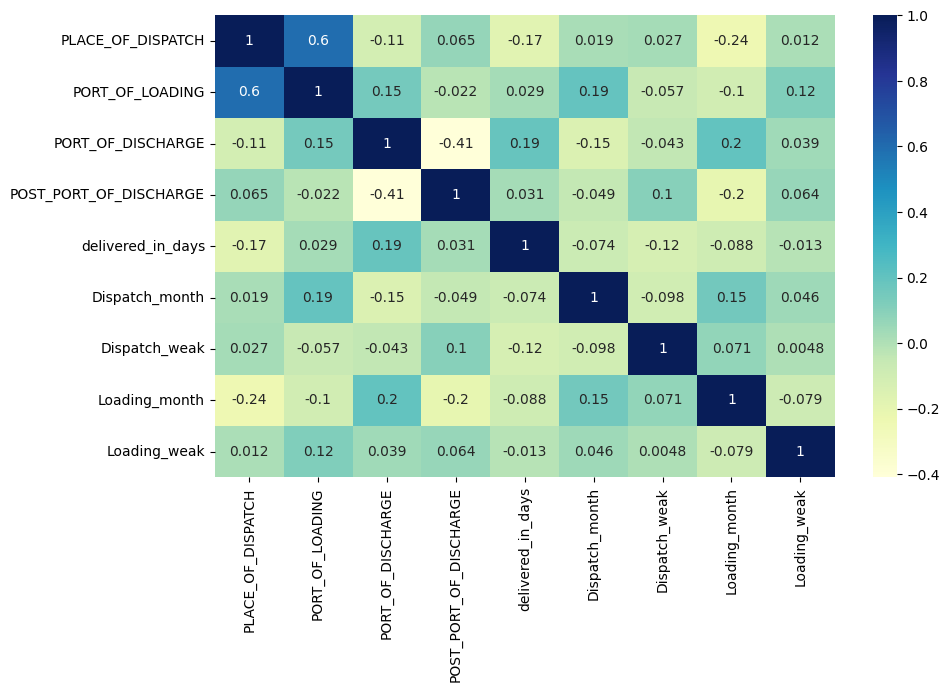

In [45]:
plt.figure(figsize=(10, 6))
dataplot = sns.heatmap(df_outlier.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [46]:
df_outlier['delivered_in_days'] = df_outlier['delivered_in_days'].dt.days
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PLACE_OF_DISPATCH       568 non-null    int64  
 1   PORT_OF_LOADING         568 non-null    int64  
 2   PORT_OF_DISCHARGE       568 non-null    int64  
 3   POST_PORT_OF_DISCHARGE  568 non-null    int64  
 4   delivered_in_days       568 non-null    int64  
 5   Dispatch_month          568 non-null    int32  
 6   Dispatch_weak           568 non-null    int32  
 7   Loading_month           119 non-null    float64
 8   Loading_weak            119 non-null    float64
dtypes: float64(2), int32(2), int64(5)
memory usage: 35.6 KB


In [47]:
target = 'delivered_in_days'
features = ['PLACE_OF_DISPATCH', 'PORT_OF_LOADING', 'PORT_OF_DISCHARGE',
       'POST_PORT_OF_DISCHARGE','Dispatch_month','Dispatch_weak', 'Loading_month', 'Loading_weak']
X = df_outlier[features]
y = df_outlier[target]
X_data = StandardScaler().fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state = 14)
# Split train and test
train_size = int(X.shape[0]*0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [48]:
model= RandomForestRegressor(n_estimators=100, random_state=10)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=10)

In [49]:
y_pred = model.predict(X_test)

In [50]:
print("Random Forest Regressor's Erro médio Absoluto: " + str(mean_absolute_error(y_pred, y_test)))
y.describe()

Random Forest Regressor's Erro médio Absoluto: 9.133065313663804


,delivered_in_days
count,568.000000
mean,55.283451
std,13.318336
min,27.000000
25%,45.750000
50%,54.000000
75%,63.000000
max,92.000000


O Erro Médio Absoluto é de 8 dias, ou seja, a diferença entre a data de entrega real (baseada no
histórico) e a data de entrega prevista (obtida pelo modelo) é de 8 dias.

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators=100, random_state=10)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train,pd.Series.ravel(y_train), cv=cv, n_jobs=4,
                                                                      train_sizes=np.linspace(.1, 1.0, 5), return_times=True)

/tmp/ipython-input-3795362872.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train,pd.Series.ravel(y_train), cv=cv, n_jobs=4,


Text(0.5, 1.0, 'Performance do modelo')

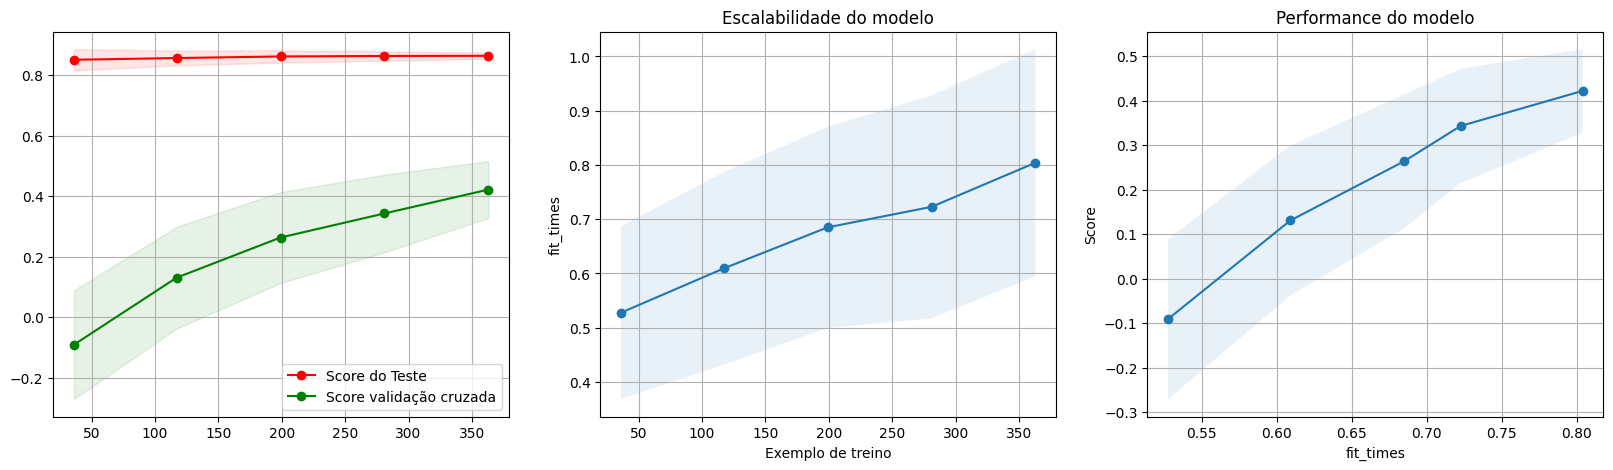

In [55]:
_,axes = plt.subplots(1, 3, figsize=(20, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score do Teste")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Score validação cruzada")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                     fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Exemplo de treino")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Escalabilidade do modelo")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance do modelo")

In [56]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [57]:
df_limpo['predicted_days'] = np.hstack([y_pred_train, y_pred_test])

In [58]:
df_limpo.head()

,index,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,DELIVERED_DATE,delivered_in_days,Dispatch_month,Dispatch_weak,Loading_month,Loading_weak,predicted_days
0,0,23,20,2,0,2021-05-18,2021-05-19,2021-07-17,2021-07-15,2021-08-03,2021-07-21,64 days,5,1,5.0,2.0,66.720901
1,1,23,20,2,0,2021-05-18,2021-05-19,2021-07-23,2021-07-21,2021-08-09,2021-07-27,70 days,5,1,5.0,2.0,66.720901
2,2,15,13,2,2,2021-04-11,2021-04-17,2021-05-05,2021-06-07,2021-06-11,2021-06-16,66 days,4,6,4.0,5.0,59.754667
3,3,21,5,2,0,2021-05-19,2021-05-20,2021-07-15,2021-07-12,2021-07-19,2021-07-20,62 days,5,2,5.0,3.0,60.316476
4,4,23,20,2,2,2021-05-18,2021-05-24,2021-06-11,2021-06-22,2021-06-26,2021-06-28,41 days,5,1,5.0,0.0,45.270022


In [59]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.133065313663804
Root Mean Squared Error: 12.881411715162004


Com o modelo concluido, ao analisar a primeira linha do conjunto de dados com os outliers
excluidos, observamos que a data de despacho do produto foi 18/05/2021 e a data prevista era
03/08/2021, quase 3 meses depois. No entanto, o pedido foi entregue em 21/07/2021, muito
antes da data prevista. Com o modelo de ML a previsão de entrega seria 67 dias depois do
despacho, confirmando para o cliente entrega em 24/07/2021. Uma predição mais precisa e
com melhores informações para planejamento do cliente.